In [ ]:
# DOLFIN is the computational backend of the FEniCS project
try:
    from dolfin import *
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    from dolfin import *

In [2]:
tol = 1E-14

class Omega_0(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] >= 0.015 and x[1] >=0.02 and x[0]<=0.02 and x[1] <=0.04


In [5]:
mesh = RectangleMesh(Point(0,0), Point(0.03, 0.08), 10, 10)
V = FunctionSpace(mesh, 'P', 1)

def boundary(x, on_boundary):
	return x[0]==0.035 and on_boundary

bcs = DirichletBC(V, 37, boundary)

In [6]:
materials = MeshFunction('size_t',mesh,mesh.topology().dim())
materials.set_all(0)
subdomain_0 = Omega_0()
subdomain_0.mark(materials, 1)

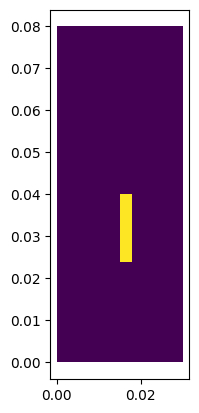

In [7]:
plot(materials)

In [18]:
V0 = FunctionSpace(mesh, 'DG', 0)

wb  = Function(V0)
Qm =  Function(V0)

wb_values = [1, 2.0]  # values of k in the two subdomains
Qm_values = [1, 2.0]  # values of k in the two subdomains
for cell_no in range(len(materials.array())):
    subdomain_no = materials.array()[cell_no]
    wb.vector()[cell_no] = wb_values[subdomain_no]
    Qm.vector()[cell_no] = Qm_values[subdomain_no]


In [21]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

k = 1
#equação a(u,v)=f(v)
a = k*dot(grad(u), grad(v))*dx - wb*u*v*dx
L = -Qm*v*dx  #f(v)

      Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:      Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:      Compiling form ffc_form_13bf8ec1f9d987d1546606e33a5fd1f594fda3ef
      
INFO:FFC:      Compiler stage 1: Analyzing form(s)
INFO:FFC:      -----------------------------------
DEBUG:FFC:        Preprocessing form using 'uflacs' representation family.
INFO:FFC:        
INFO:FFC:        Geometric dimension:       2
        Number of cell subdomains: 0
        Rank:                      2
        Arguments:                 '(v_0, v_1)'
        Number of coefficients:    1
        Coefficients:              '[f_47]'
        Unique elements:           'CG1(?,?), DG0(?,?), Vector<2 x CG1(?,?)>'
        Unique sub elements:       'CG1(?,?), DG0(?,?), Vector<2 x CG1(?,?)>'
        
INFO:FFC:        representation:    auto --> uflacs
INFO:FFC:        quadrature_rule:   auto --> default
INFO:FFC:        quadrature_degree: auto --> 2
INFO:FFC:        quadrature_degree: 2
INFO:FFC:        
INFO:FFC:  

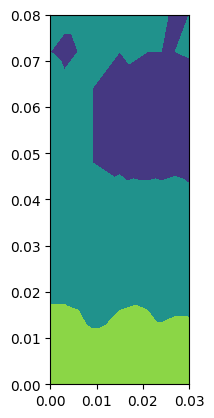

In [22]:
uh = Function(V)
solve(a == L, uh, bcs)
plot(uh)
f = File('resultado.pvd')
f << uh